In [1]:
library(Seurat)
library(gridExtra)
library(Matrix)
library(ggplot2)

In [2]:
source('/home/public/ghx/software/my_seurat.r')

In [3]:
seu <- readRDS('/home/public/ghx/wuLab/IPF/results/0828_v4/rds/Mac.rds')

In [4]:
markers <- read.csv('/home/public/ghx/wuLab/IPF/results/0828_v4/markers/Mac_ct_markers.csv')

In [6]:
ct.order <- levels(seu@meta.data$cell.type)

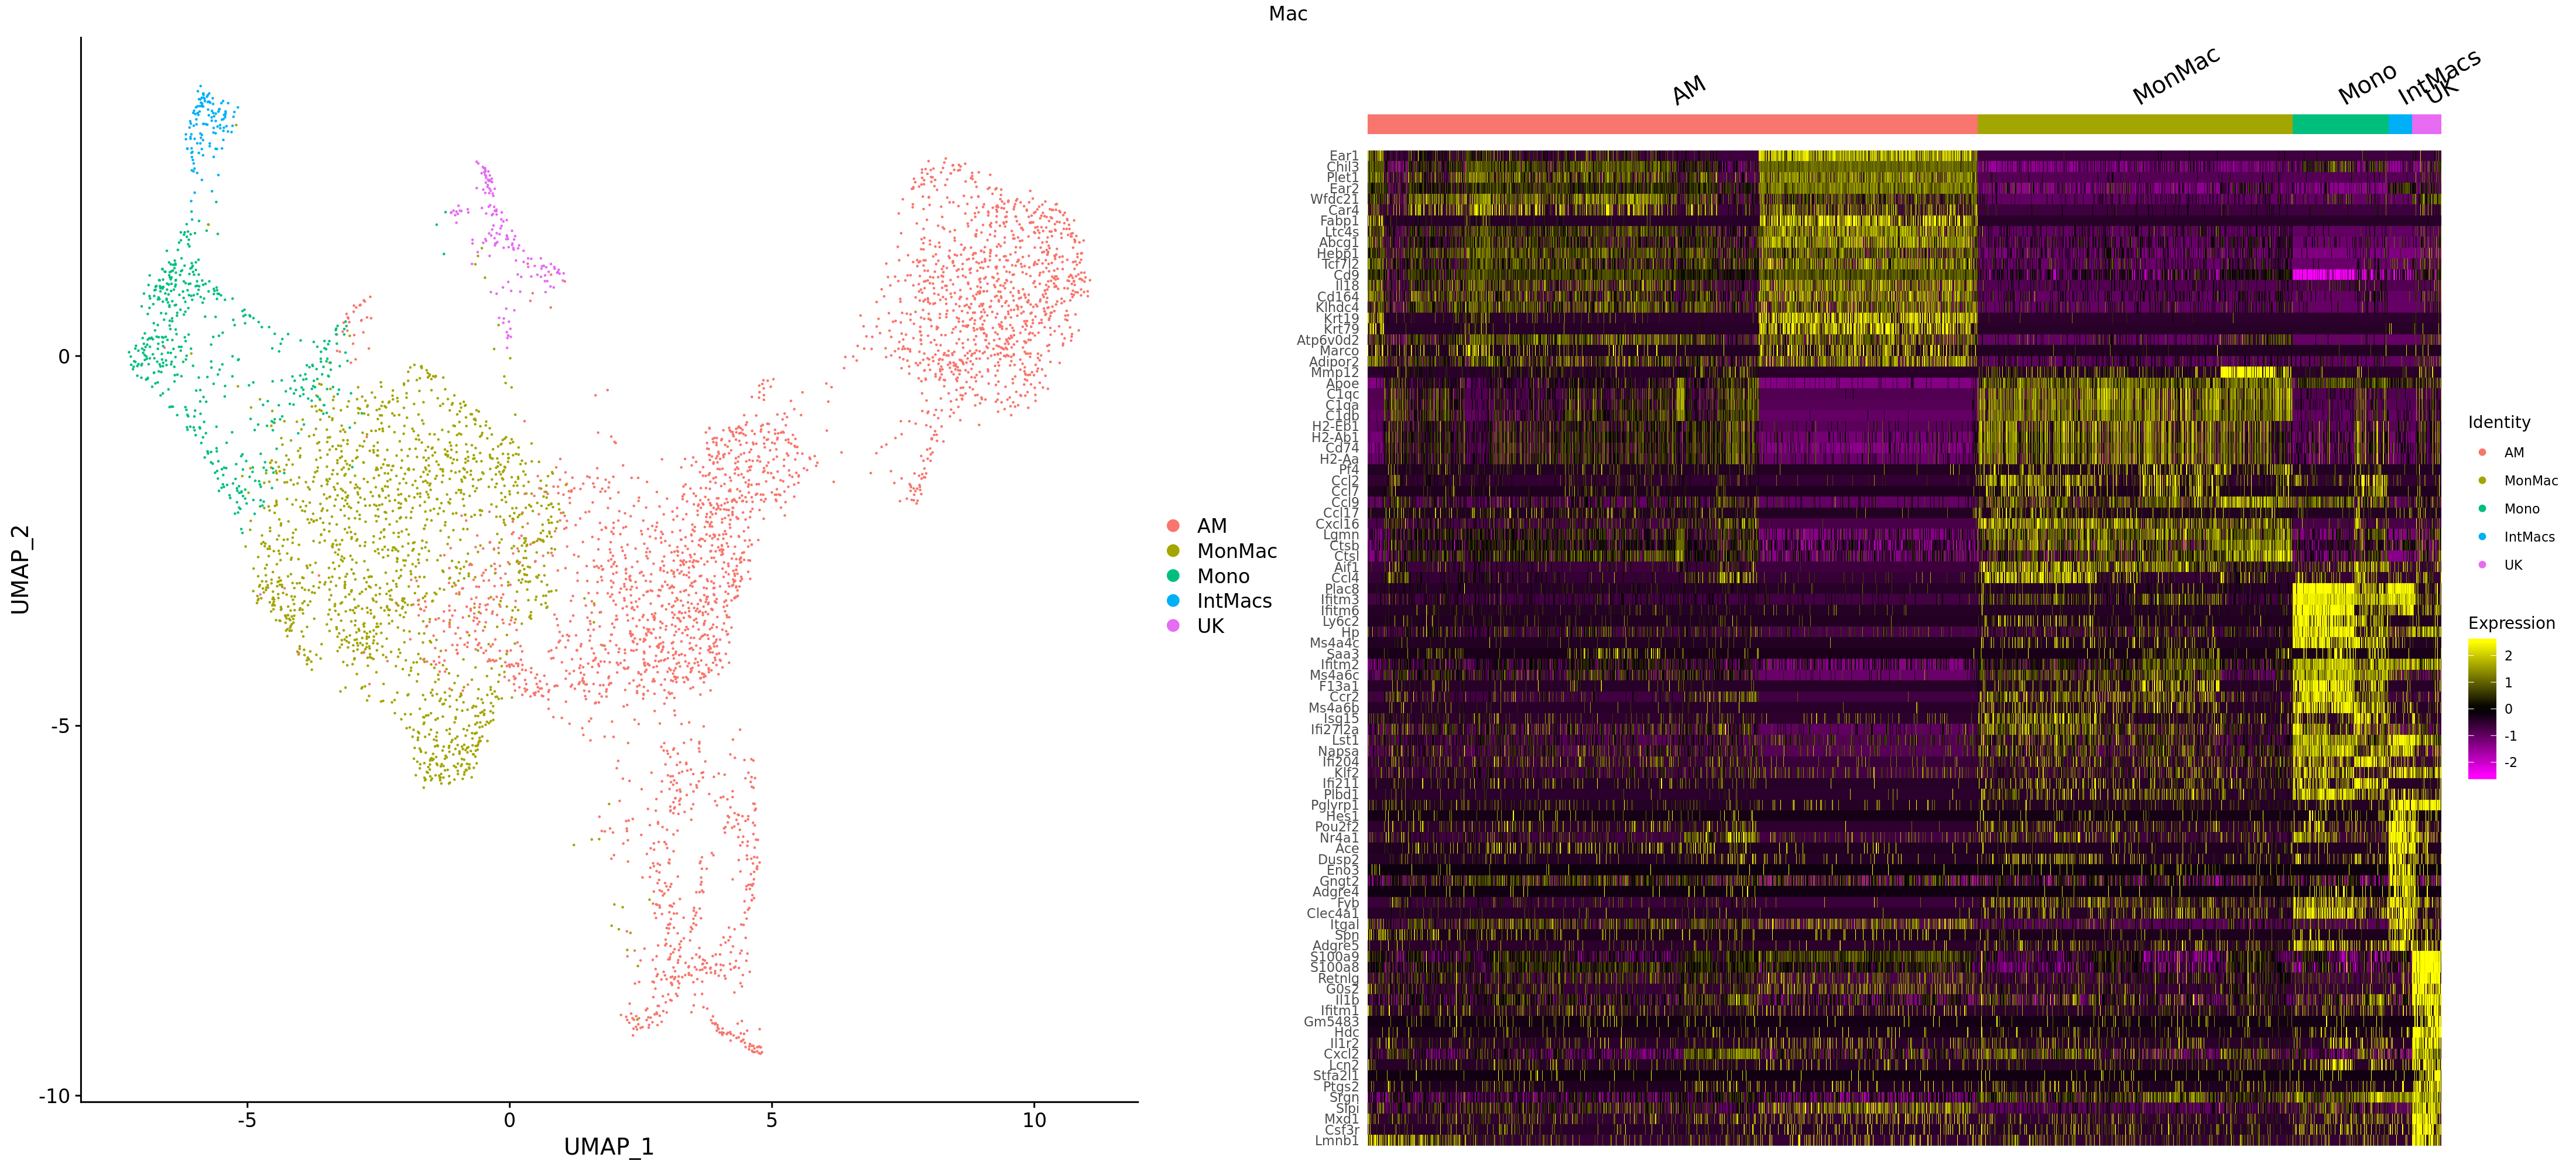

In [8]:
top10 <- extractTopNMarkers(df = markers, top_n = 20, group.order = ct.order)

p1 <- DimPlot(object = seu, group.by = 'cell.type', pt.size = 0.1, label = F)
p2 <- DoHeatmap(object = seu, features = as.character(top10$gene), draw.lines = F,
          size = 5, angle = 30, group.by = 'cell.type') + 
theme(text = element_text(size = 10))

options(repr.plot.width=22, repr.plot.height=10, repr.plot.res = 200)
grid.arrange(grobs = list(p1,p2), ncol = 2, width = c(1,1), heigths = c(0.5,0.5),
            top = 'Mac')

In [9]:
library(Seurat)
library(velocyto.R)
library(SeuratWrappers)


Attaching package: ‘SeuratWrappers’


The following objects are masked from ‘package:Seurat’:

    ALRAChooseKPlot, RunALRA




In [10]:
setwd('/home/public/ghx/wuLab/IPF/velocity')

In [22]:
options(repr.plot.width=10, repr.plot.height=10, repr.plot.res = 200)

In [ ]:
Loom.seu <- list()

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to tsne_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'Wh

delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.2899512  min.arrow.size= 0.005799024  max.grid.arrow.length= 0.04539128  done


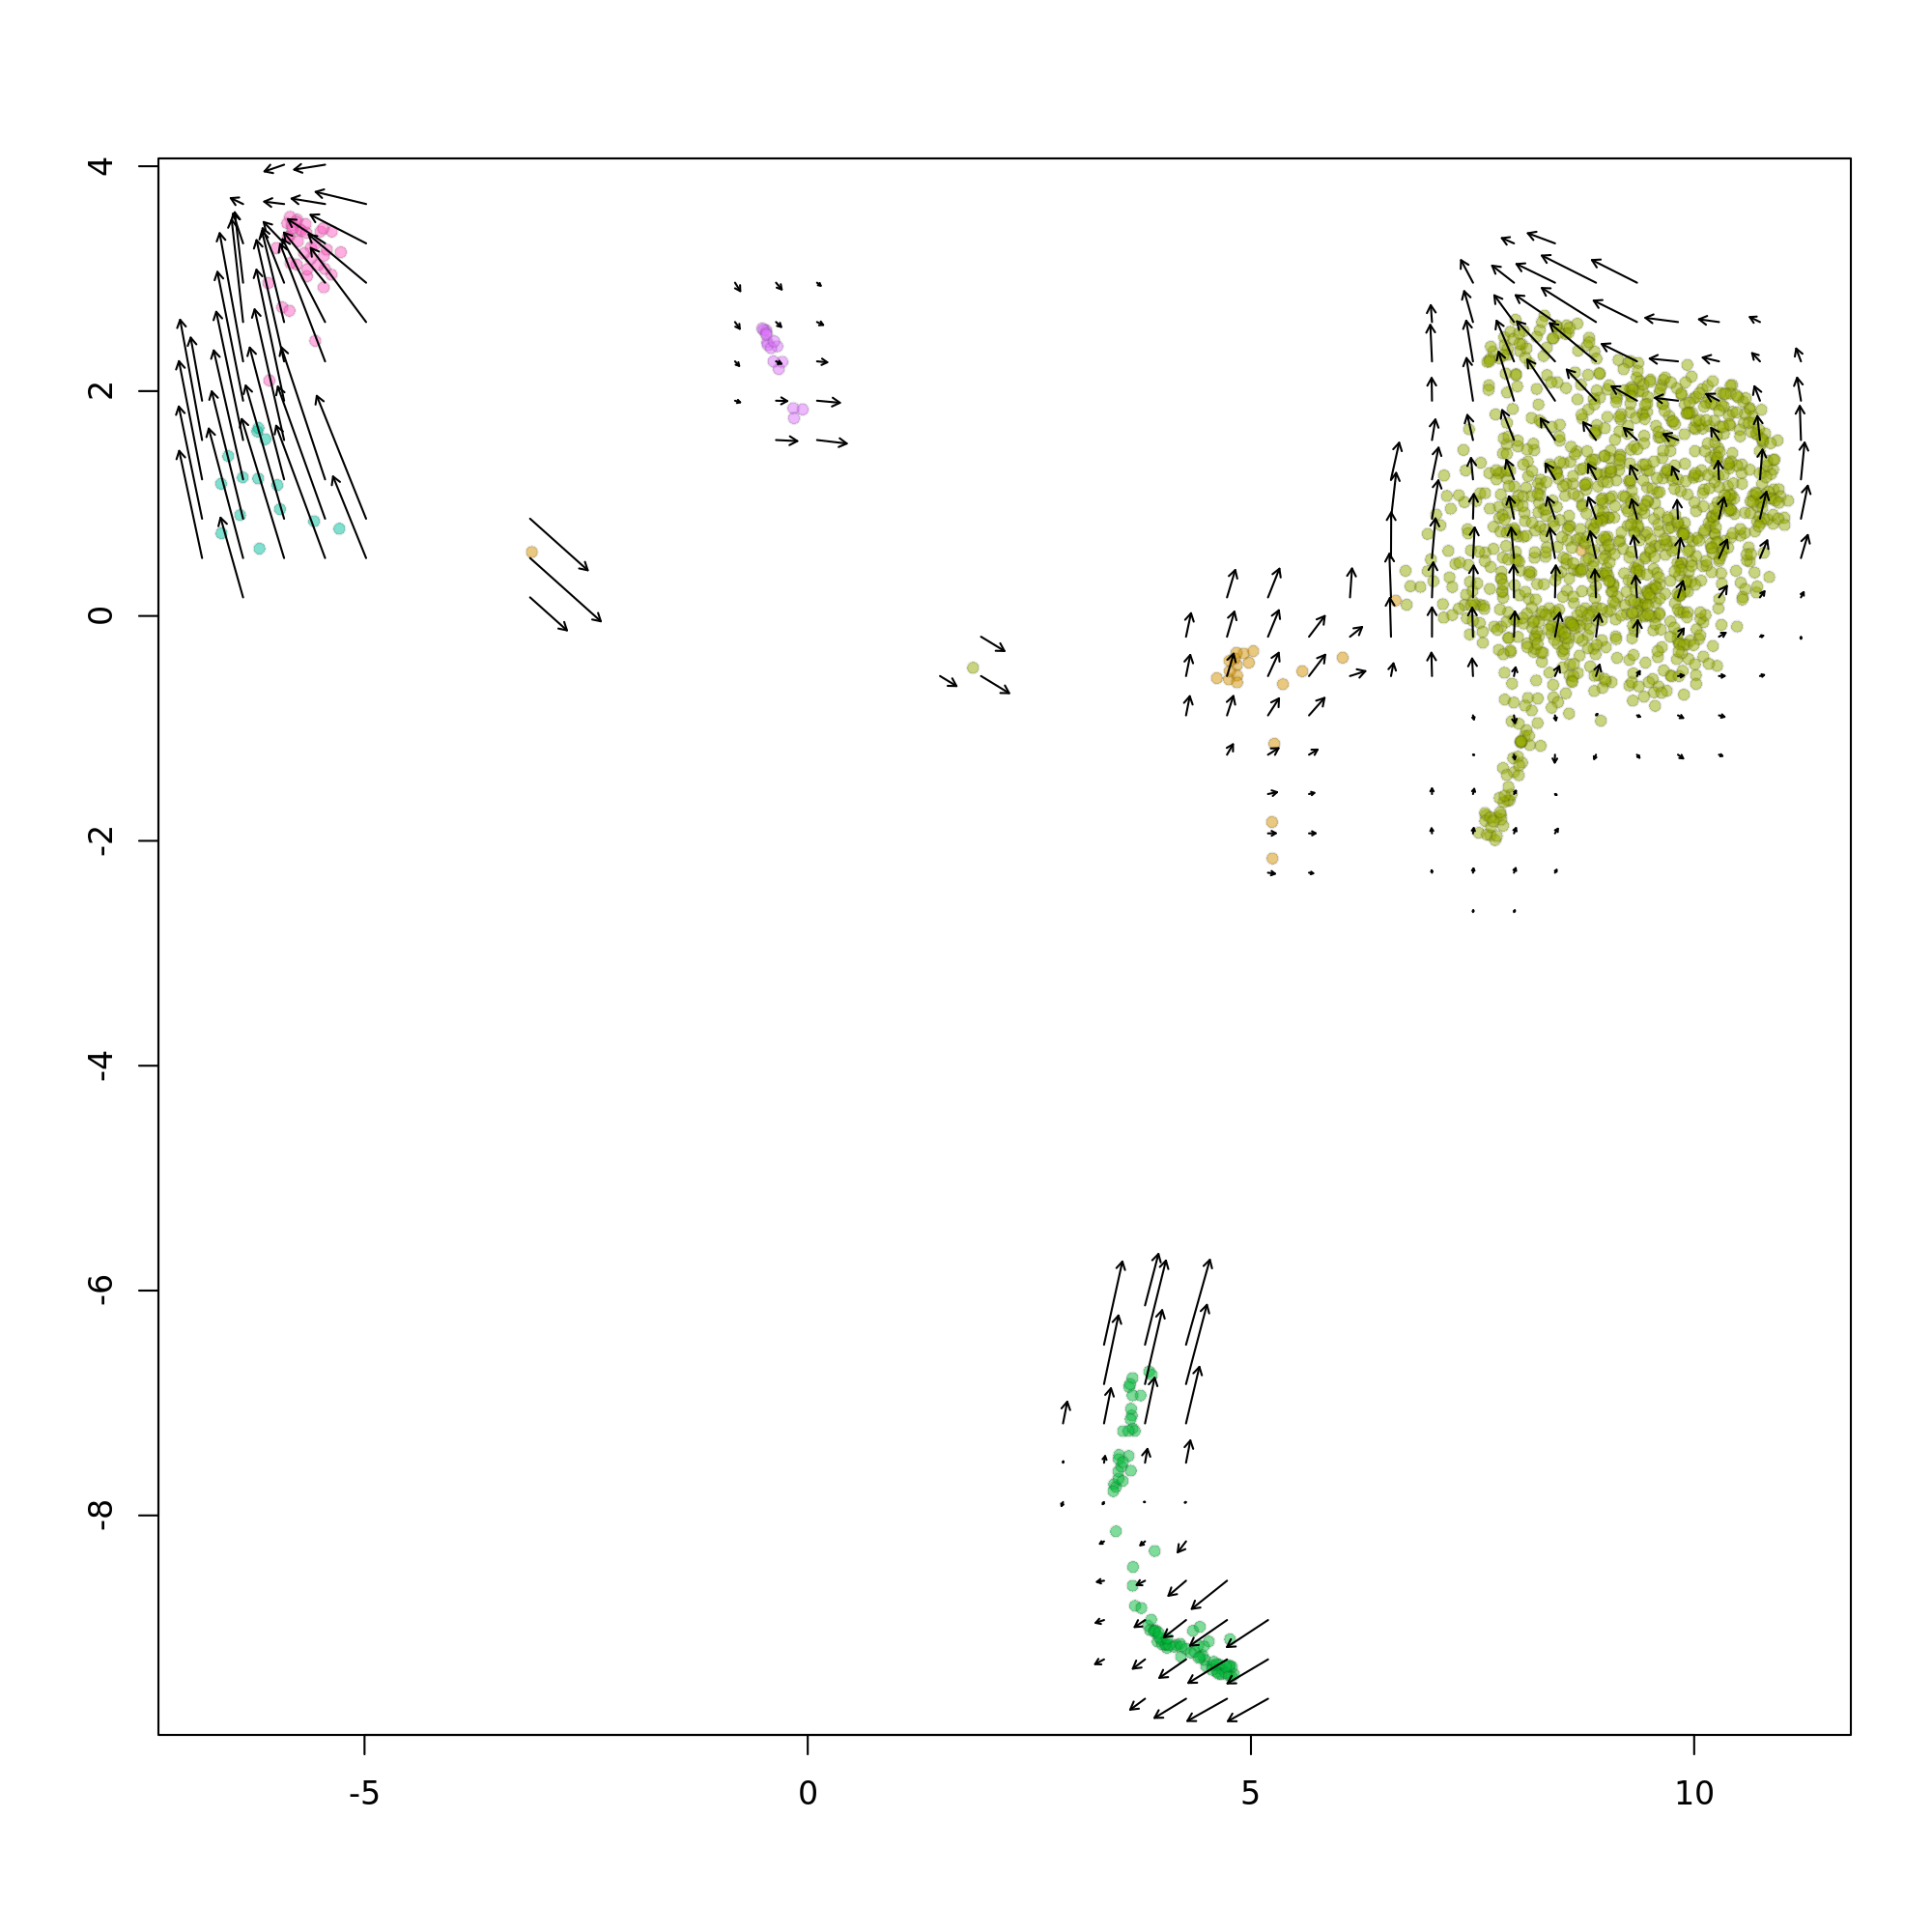

In [43]:
day <- 'D0'
D.velo <- ReadVelocity(paste0('./',day,'.loom'))
D.seu <- as.Seurat(D.velo)
new.names <- sapply(strsplit(x = Cells(D.seu), split = ':'), simplify = T, 
                    FUN = function(x){
                        return(paste(c(x[1], substring(x[2], first = 1,
                                            last = nchar(x[2])-1)), collapse = '.'))
                    })
D.seu <- RenameCells(object = D.seu, 
                  new.names = new.names)

intersect.cells <- intersect(Cells(D.seu), Cells(seu))
D.seu <- SubsetData(D.seu, cells = intersect.cells, )
day.mac <- SubsetData(object = seu, cells = intersect.cells)
for(reduc in c('pca','tsne','umap')){
    reduc.object <- day.mac[[reduc]]
    new.reduc <- CreateDimReducObject(embeddings = reduc.object@cell.embeddings,
                         stdev = reduc.object@stdev,
                         loadings = reduc.object@feature.loadings,
                         key = reduc,
                         assay = 'spliced')
    D.seu[[reduc]] <- new.reduc
}
Idents(D.seu) <- day.mac@active.ident[Cells(D.seu)]
mac.metadata <- day.mac@meta.data[Cells(D.seu), setdiff(names(day.mac@meta.data),
                                                        names(D.seu@meta.data))]
D.seu@meta.data <- cbind(D.seu@meta.data, mac.metadata)

ident.remove <- c()
for(c in levels(D.seu@active.ident)){
    if(sum(D.seu@active.ident == c)<=10){
        ident.remove <- c(ident.remove, c)
    } 
}
if(length(ident.remove)>0){
    D.seu <- SubsetData(object = D.seu, ident.remove = ident.remove)
}

D.seu <- RunVelocity(object = D.seu, deltaT = 1, kCells = 25, fit.quantile = 0.02)

ident.colors <- (scales::hue_pal())(n = length(x = levels(x = D.seu)))
names(x = ident.colors) <- levels(x = D.seu)
cell.colors <- ident.colors[Idents(object = D.seu)]
names(x = cell.colors) <- colnames(x = D.seu)

show.velocity.on.embedding.cor(emb = Embeddings(object = D.seu, reduction = "umap"), vel = Tool(object = D.seu, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to tsne_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”
Filtering genes in the spliced matrix

Filtering genes in the unspliced matrix

Calculating embedding distance matrix



delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.2924785  min.arrow.size= 0.005849571  max.grid.arrow.length= 0.04539128  done


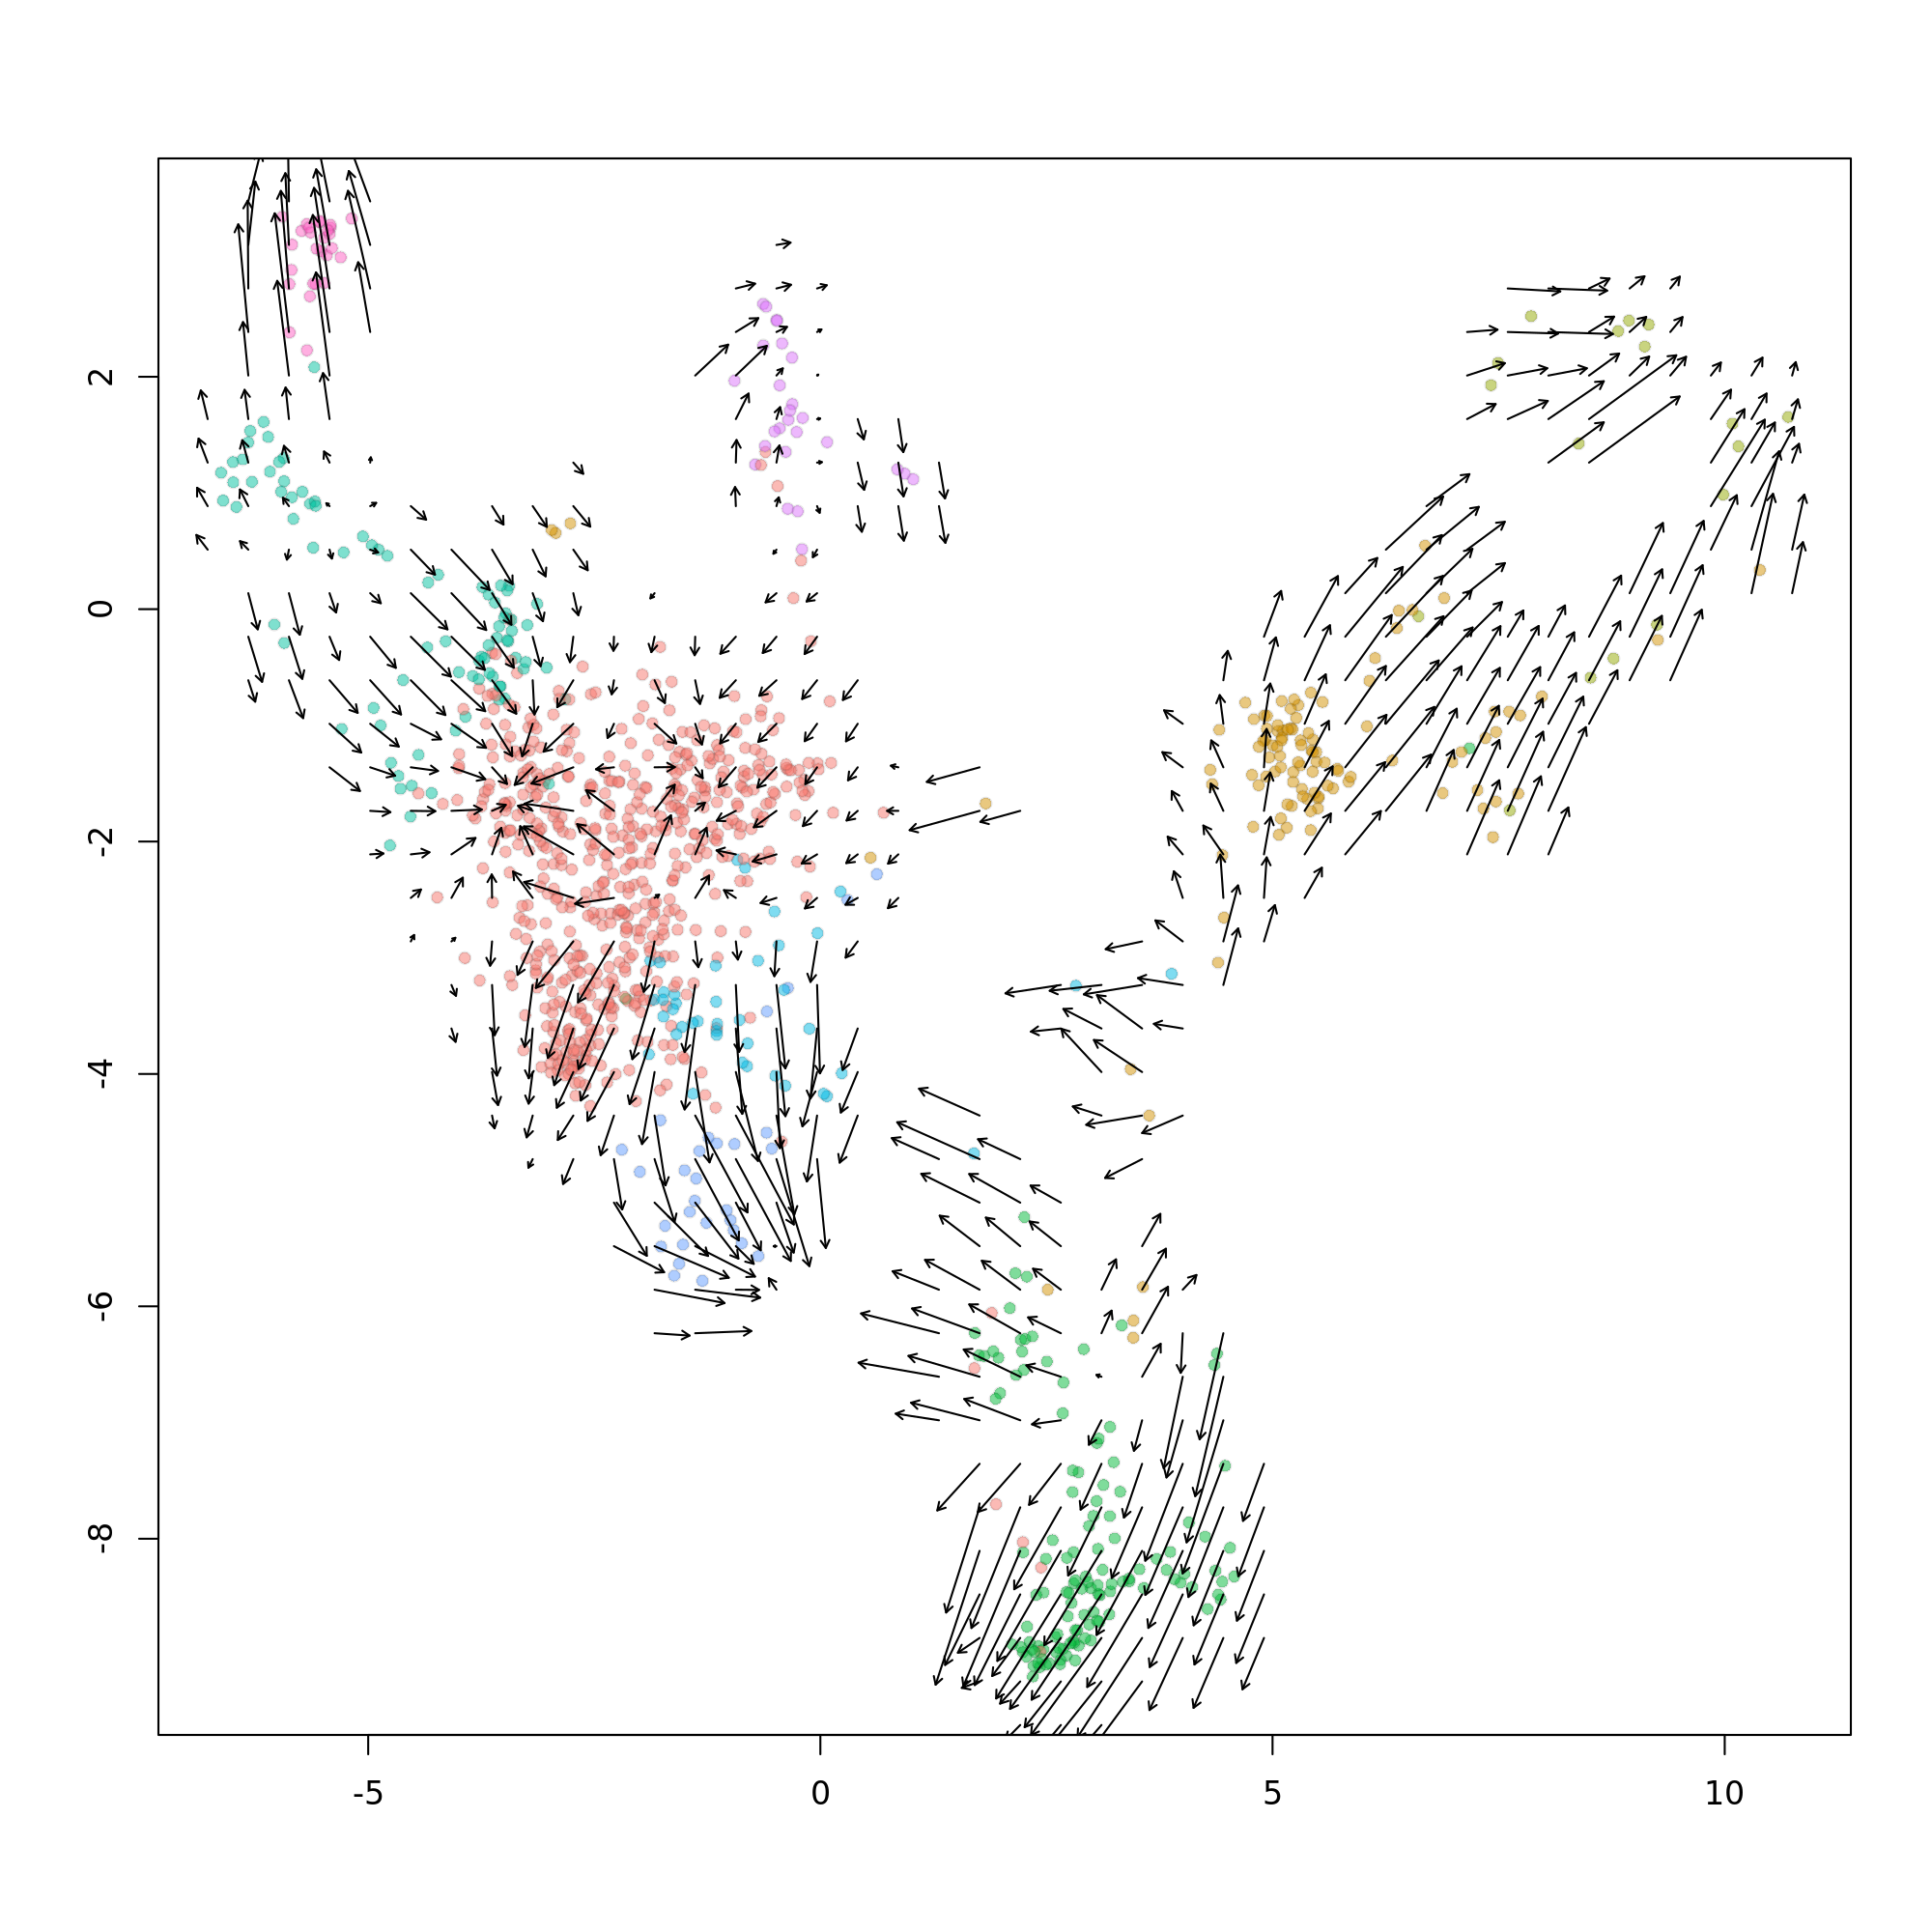

In [44]:
day <- 'D7'
D.velo <- ReadVelocity(paste0('./',day,'.loom'))
D.seu <- as.Seurat(D.velo)
new.names <- sapply(strsplit(x = Cells(D.seu), split = ':'), simplify = T, 
                    FUN = function(x){
                        return(paste(c(x[1], substring(x[2], first = 1,
                                            last = nchar(x[2])-1)), collapse = '.'))
                    })
D.seu <- RenameCells(object = D.seu, 
                  new.names = new.names)

intersect.cells <- intersect(Cells(D.seu), Cells(seu))
D.seu <- SubsetData(D.seu, cells = intersect.cells, )
day.mac <- SubsetData(object = seu, cells = intersect.cells)
for(reduc in c('pca','tsne','umap')){
    reduc.object <- day.mac[[reduc]]
    new.reduc <- CreateDimReducObject(embeddings = reduc.object@cell.embeddings,
                         stdev = reduc.object@stdev,
                         loadings = reduc.object@feature.loadings,
                         key = reduc,
                         assay = 'spliced')
    D.seu[[reduc]] <- new.reduc
}
Idents(D.seu) <- day.mac@active.ident[Cells(D.seu)]
mac.metadata <- day.mac@meta.data[Cells(D.seu), setdiff(names(day.mac@meta.data),
                                                        names(D.seu@meta.data))]
D.seu@meta.data <- cbind(D.seu@meta.data, mac.metadata)

ident.remove <- c()
for(c in levels(D.seu@active.ident)){
    if(sum(D.seu@active.ident == c)<=10){
        ident.remove <- c(ident.remove, c)
    } 
}
if(length(ident.remove)>0){
    D.seu <- SubsetData(object = D.seu, ident.remove = ident.remove)
}

D.seu <- RunVelocity(object = D.seu, deltaT = 1, kCells = 25, fit.quantile = 0.02)

ident.colors <- (scales::hue_pal())(n = length(x = levels(x = D.seu)))
names(x = ident.colors) <- levels(x = D.seu)
cell.colors <- ident.colors[Idents(object = D.seu)]
names(x = cell.colors) <- colnames(x = D.seu)

show.velocity.on.embedding.cor(emb = Embeddings(object = D.seu, reduction = "umap"), vel = Tool(object = D.seu, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to tsne_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'Wh

delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.2837568  min.arrow.size= 0.005675135  max.grid.arrow.length= 0.04539128  done


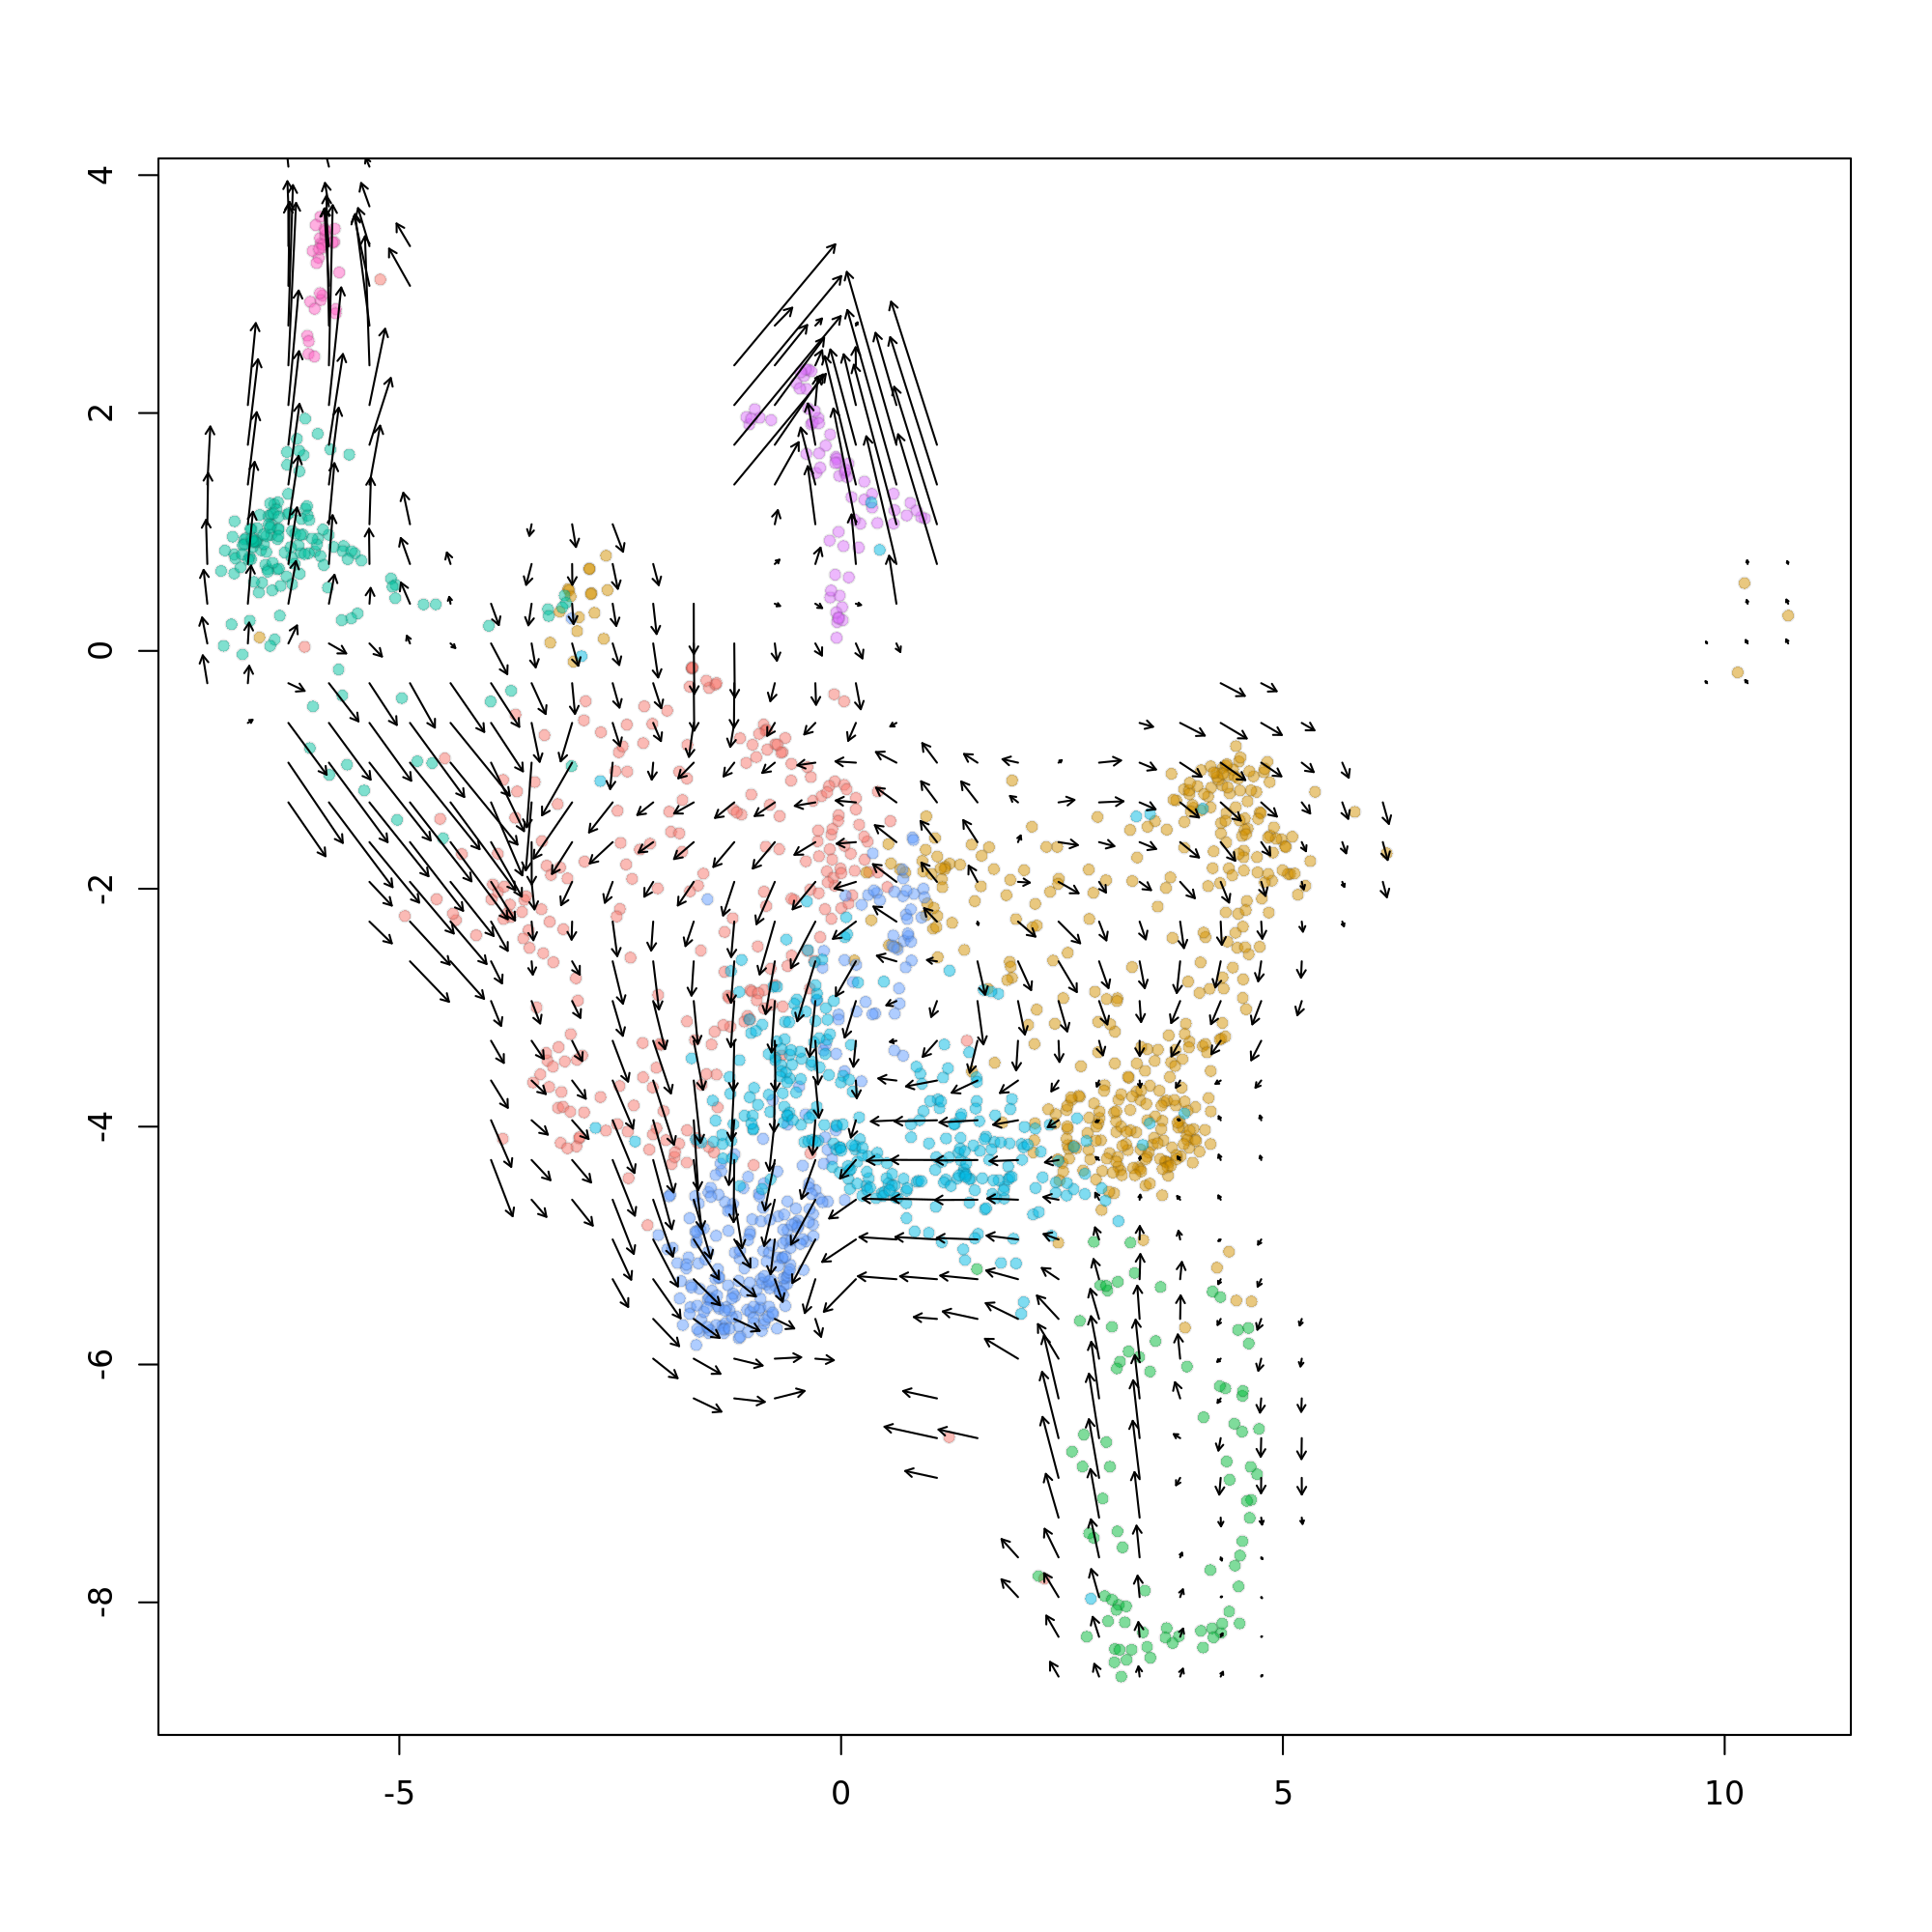

In [45]:
day <- 'D14'
D.velo <- ReadVelocity(paste0('./',day,'.loom'))
D.seu <- as.Seurat(D.velo)
new.names <- sapply(strsplit(x = Cells(D.seu), split = ':'), simplify = T, 
                    FUN = function(x){
                        return(paste(c(x[1], substring(x[2], first = 1,
                                            last = nchar(x[2])-1)), collapse = '.'))
                    })
D.seu <- RenameCells(object = D.seu, 
                  new.names = new.names)

intersect.cells <- intersect(Cells(D.seu), Cells(seu))
D.seu <- SubsetData(D.seu, cells = intersect.cells, )
day.mac <- SubsetData(object = seu, cells = intersect.cells)
for(reduc in c('pca','tsne','umap')){
    reduc.object <- day.mac[[reduc]]
    new.reduc <- CreateDimReducObject(embeddings = reduc.object@cell.embeddings,
                         stdev = reduc.object@stdev,
                         loadings = reduc.object@feature.loadings,
                         key = reduc,
                         assay = 'spliced')
    D.seu[[reduc]] <- new.reduc
}
Idents(D.seu) <- day.mac@active.ident[Cells(D.seu)]
mac.metadata <- day.mac@meta.data[Cells(D.seu), setdiff(names(day.mac@meta.data),
                                                        names(D.seu@meta.data))]
D.seu@meta.data <- cbind(D.seu@meta.data, mac.metadata)

ident.remove <- c()
for(c in levels(D.seu@active.ident)){
    if(sum(D.seu@active.ident == c)<=10){
        ident.remove <- c(ident.remove, c)
    } 
}
if(length(ident.remove)>0){
    D.seu <- SubsetData(object = D.seu, ident.remove = ident.remove)
}

D.seu <- RunVelocity(object = D.seu, deltaT = 1, kCells = 25, fit.quantile = 0.02)

ident.colors <- (scales::hue_pal())(n = length(x = levels(x = D.seu)))
names(x = ident.colors) <- levels(x = D.seu)
cell.colors <- ident.colors[Idents(object = D.seu)]
names(x = cell.colors) <- colnames(x = D.seu)

show.velocity.on.embedding.cor(emb = Embeddings(object = D.seu, reduction = "umap"), vel = Tool(object = D.seu, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to tsne_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to umap_”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'Wh

delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.2297822  min.arrow.size= 0.004595644  max.grid.arrow.length= 0.04539128  done


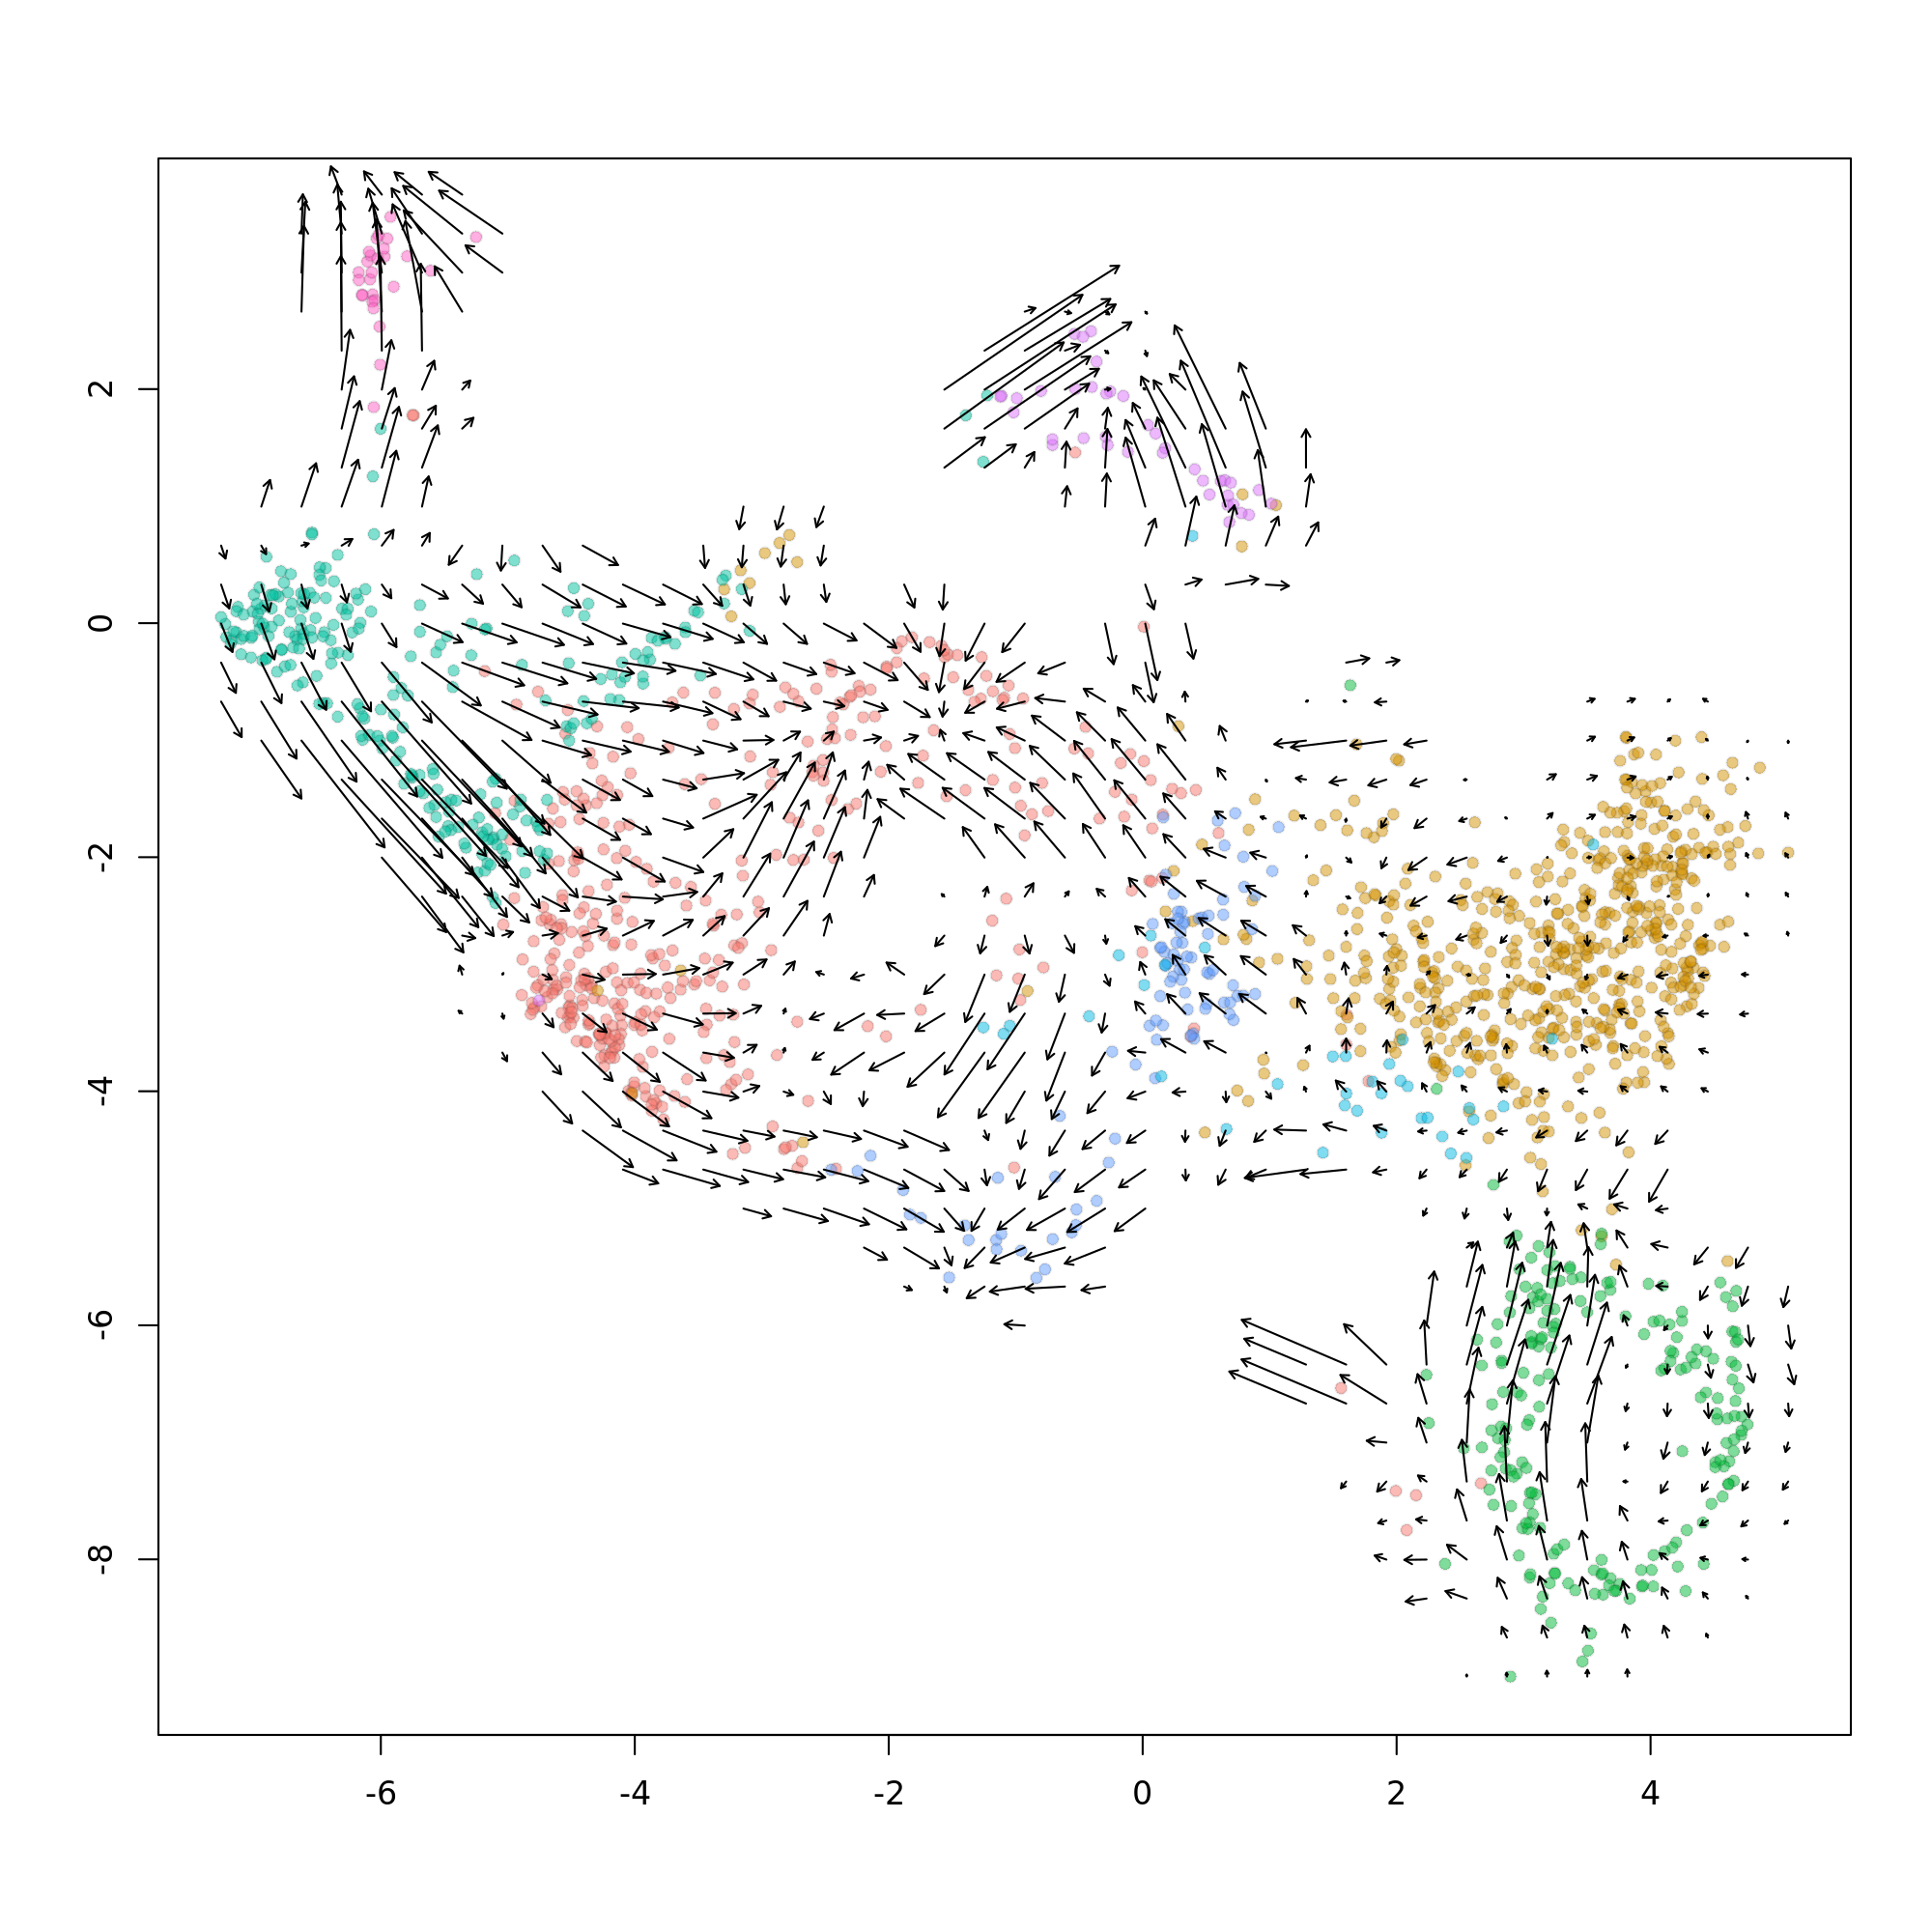

In [46]:
day <- 'D21'
D.velo <- ReadVelocity(paste0('./',day,'.loom'))
D.seu <- as.Seurat(D.velo)
new.names <- sapply(strsplit(x = Cells(D.seu), split = ':'), simplify = T, 
                    FUN = function(x){
                        return(paste(c(x[1], substring(x[2], first = 1,
                                            last = nchar(x[2])-1)), collapse = '.'))
                    })
D.seu <- RenameCells(object = D.seu, 
                  new.names = new.names)

intersect.cells <- intersect(Cells(D.seu), Cells(seu))
D.seu <- SubsetData(D.seu, cells = intersect.cells, )
day.mac <- SubsetData(object = seu, cells = intersect.cells)
for(reduc in c('pca','tsne','umap')){
    reduc.object <- day.mac[[reduc]]
    new.reduc <- CreateDimReducObject(embeddings = reduc.object@cell.embeddings,
                         stdev = reduc.object@stdev,
                         loadings = reduc.object@feature.loadings,
                         key = reduc,
                         assay = 'spliced')
    D.seu[[reduc]] <- new.reduc
}
Idents(D.seu) <- day.mac@active.ident[Cells(D.seu)]
mac.metadata <- day.mac@meta.data[Cells(D.seu), setdiff(names(day.mac@meta.data),
                                                        names(D.seu@meta.data))]
D.seu@meta.data <- cbind(D.seu@meta.data, mac.metadata)

ident.remove <- c()
for(c in levels(D.seu@active.ident)){
    if(sum(D.seu@active.ident == c)<=10){
        ident.remove <- c(ident.remove, c)
    } 
}
if(length(ident.remove)>0){
    D.seu <- SubsetData(object = D.seu, ident.remove = ident.remove)
}

D.seu <- RunVelocity(object = D.seu, deltaT = 1, kCells = 25, fit.quantile = 0.02)

ident.colors <- (scales::hue_pal())(n = length(x = levels(x = D.seu)))
names(x = ident.colors) <- levels(x = D.seu)
cell.colors <- ident.colors[Idents(object = D.seu)]
names(x = cell.colors) <- colnames(x = D.seu)

show.velocity.on.embedding.cor(emb = Embeddings(object = D.seu, reduction = "umap"), vel = Tool(object = D.seu, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

# merge to do all velocity

In [59]:

for(day in levels(seu@meta.data$sampleID)){
    D.velo <- ReadVelocity(paste0('./',day,'.loom'))
    D.seu <- as.Seurat(D.velo)
    new.names <- sapply(strsplit(x = Cells(D.seu), split = ':'), simplify = T, 
                        FUN = function(x){
                            return(paste(c(x[1], substring(x[2], first = 1,
                                                last = nchar(x[2])-1)), collapse = '.'))
                        })
    D.seu <- RenameCells(object = D.seu, 
                      new.names = new.names)
    intersect.cells <- intersect(Cells(D.seu), Cells(Mac.seu))
    D.seu <- SubsetData(D.seu, cells = intersect.cells, )
    Loom.seu[[day]] <- D.seu
}

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”
Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”
Warning message:
“'SubsetData' is deprecated.
Use 'subs

In [60]:
seu.all <- merge(x = Loom.seu[[1]], y = unlist(Loom.seu)[2:4])

In [64]:
intersect.cells <- intersect(Cells(Mac.seu), Cells(seu.all))

In [63]:
Mac.seu

An object of class Seurat 
12247 features across 5468 samples within 1 assay 
Active assay: RNA (12247 features)
 3 dimensional reductions calculated: pca, umap, tsne

In [96]:
mac.metadata <- Mac.seu@meta.data[Cells(seu.all), setdiff(names(Mac.seu@meta.data),
                                                        names(seu.all@meta.data))]

In [97]:
seu.all@meta.data <- cbind(seu.all@meta.data, mac.metadata)

In [69]:
Mac.seu <- SubsetData(object = Mac.seu, cells = intersect.cells)

Warning message:
“'SubsetData' is deprecated.
Use 'subset' instead.
See help("Deprecated")”
Warning message:
“'OldWhichCells' is deprecated.
Use 'WhichCells' instead.
See help("Deprecated")”


In [86]:
for(reduc in c('pca','tsne','umap')){
    reduc.object <- Mac.seu[[reduc]]
    new.reduc <- CreateDimReducObject(embeddings = reduc.object@cell.embeddings,
                         stdev = reduc.object@stdev,
                         loadings = reduc.object@feature.loadings,
                         key = reduc,
                         assay = 'spliced')
    seu.all[[reduc]] <- new.reduc
}


Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to pca_”


In [101]:
Idents(seu.all) <- Mac.seu@active.ident[Cells(seu.all)]

In [105]:
seu.all <- RunVelocity(object = seu.all, deltaT = 1, kCells = 25, fit.quantile = 0.02)

Filtering genes in the spliced matrix

Filtering genes in the unspliced matrix

Calculating embedding distance matrix



In [103]:
ident.colors <- (scales::hue_pal())(n = length(x = levels(x = seu.all)))
names(x = ident.colors) <- levels(x = seu.all)
cell.colors <- ident.colors[Idents(object = seu.all)]
names(x = cell.colors) <- colnames(x = seu.all)

delta projections ... sqrt knn ... transition probs ... done
calculating arrows ... done
grid estimates ... grid.sd= 0.3009614  min.arrow.size= 0.006019228  max.grid.arrow.length= 0.04539128  done


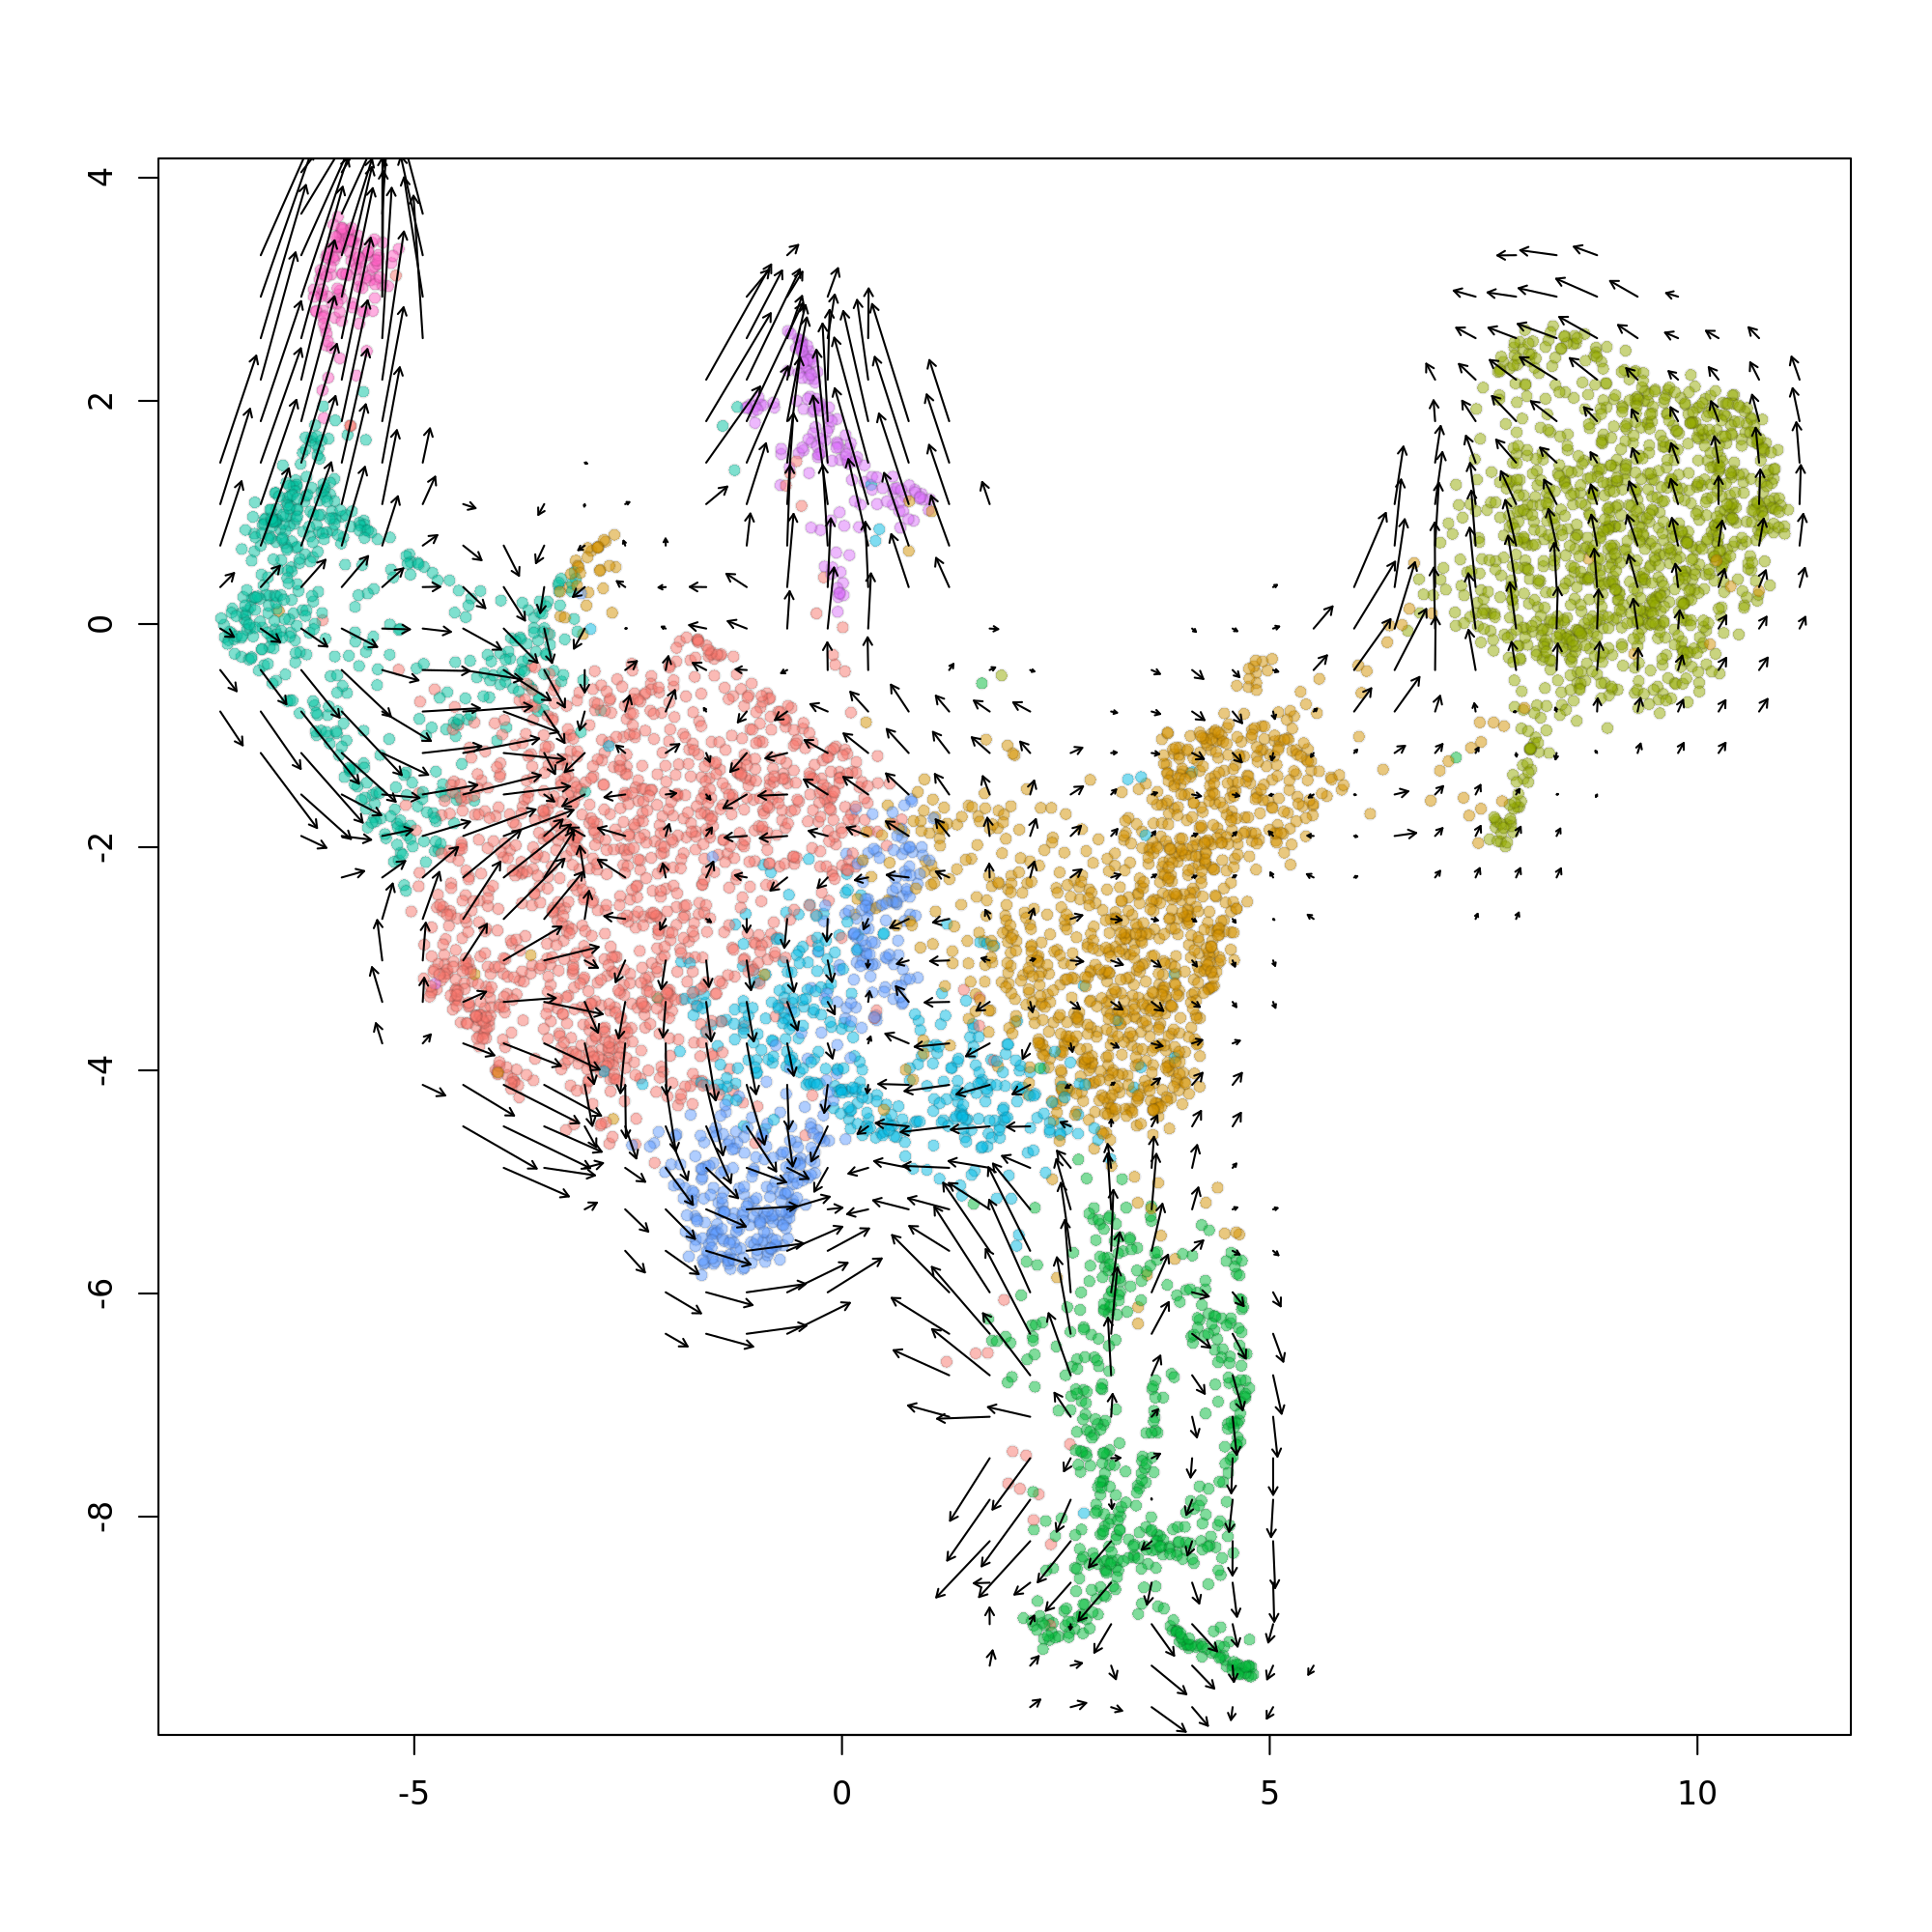

In [106]:
show.velocity.on.embedding.cor(emb = Embeddings(object = seu.all, reduction = "umap"), vel = Tool(object = seu.all, 
    slot = "RunVelocity"), n = 200, scale = "sqrt", cell.colors = ac(x = cell.colors, alpha = 0.5), 
    cex = 0.8, arrow.scale = 3, show.grid.flow = TRUE, min.grid.cell.mass = 0.5, grid.n = 40, arrow.lwd = 1, 
    do.par = FALSE, cell.border.alpha = 0.1)

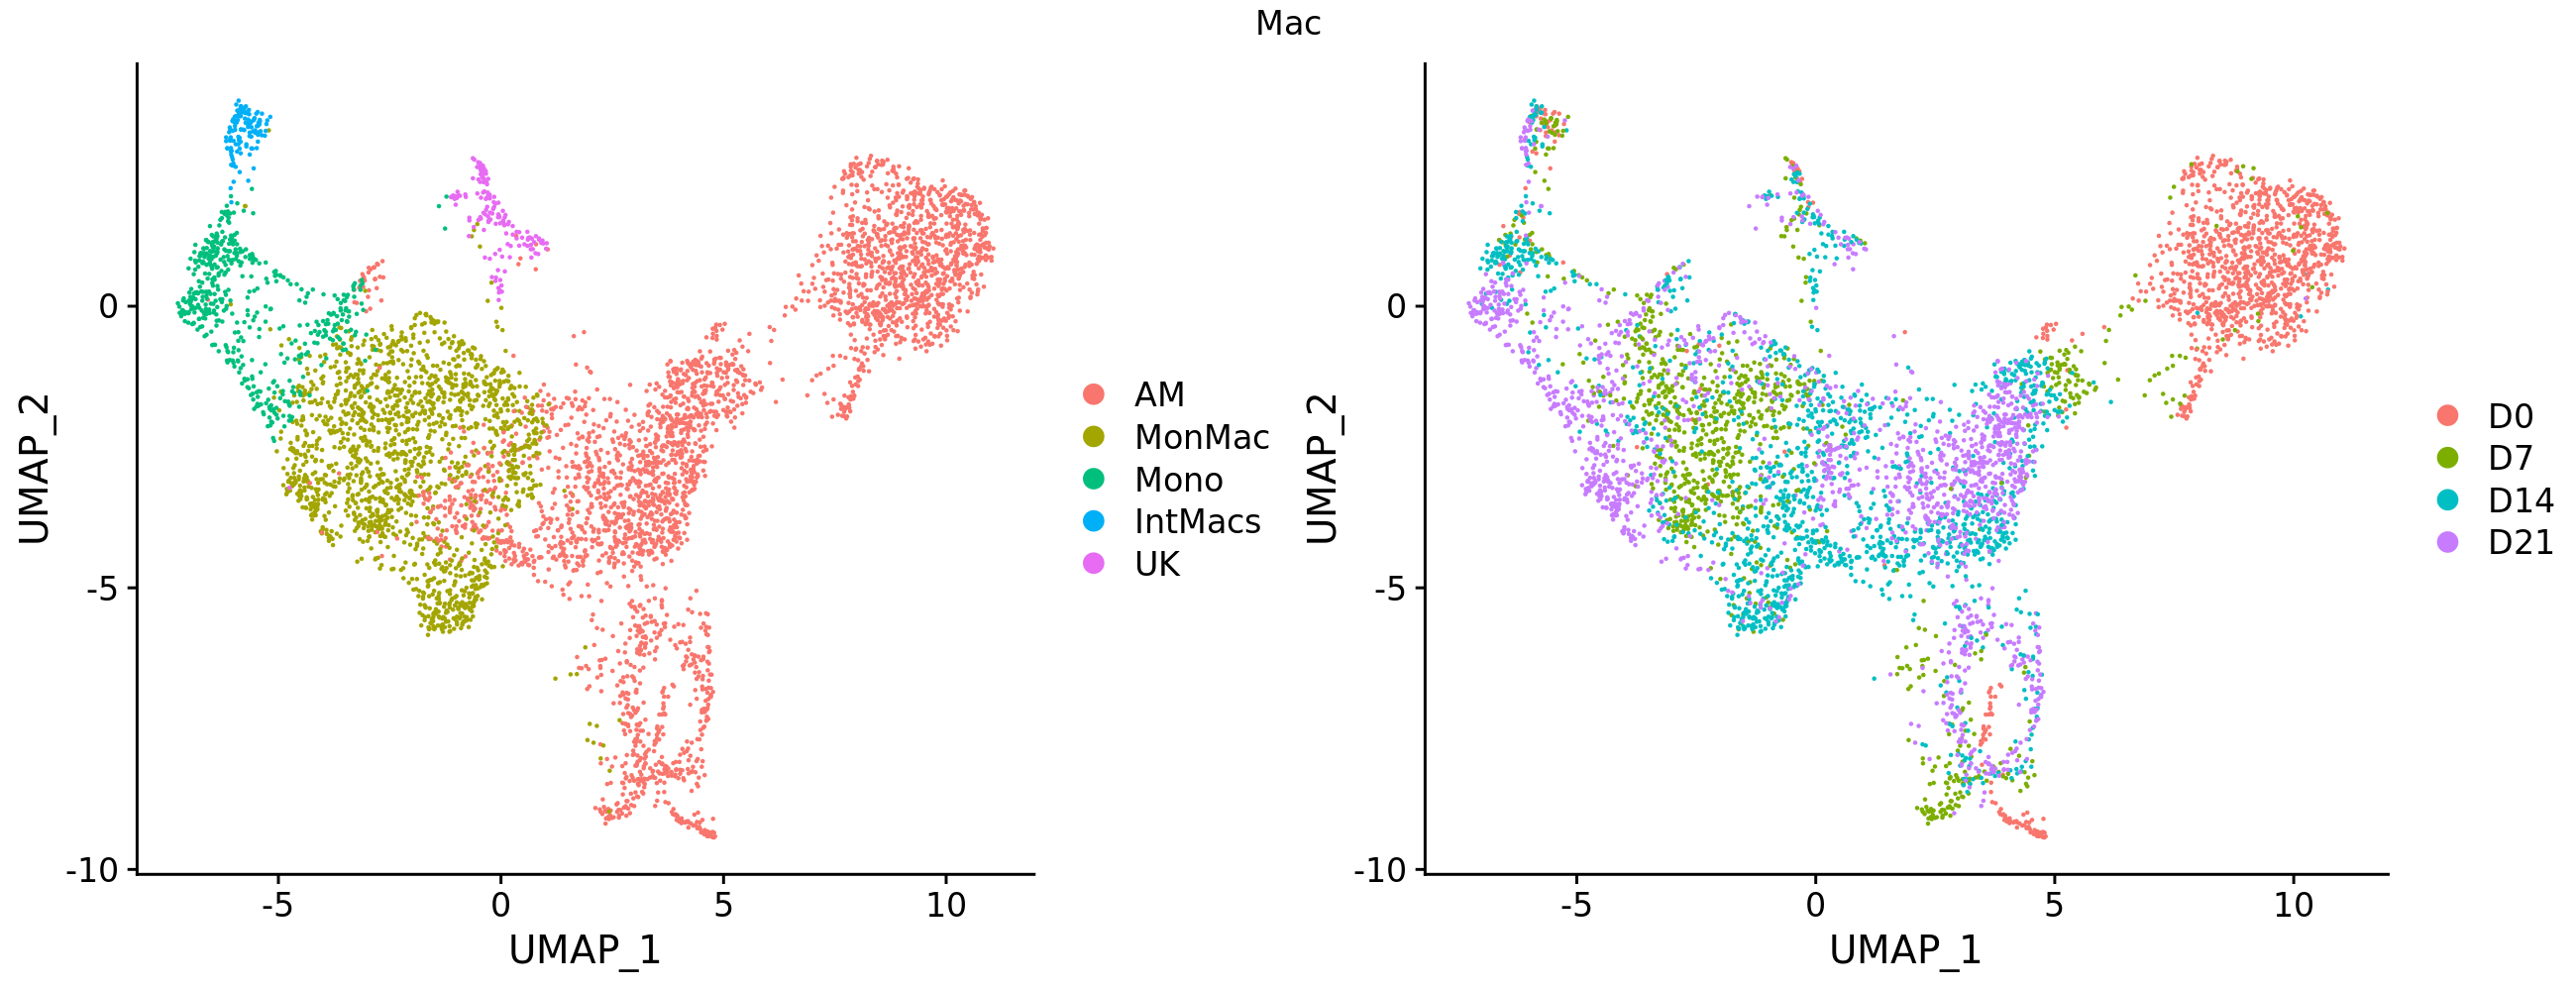

In [8]:
p1 <- DimPlot(object = Mac.seu, group.by = 'cell.type', pt.size = 0.1, label = F)
p2 <- DimPlot(object = Mac.seu, group.by = 'sampleID', pt.size = 0.1, label = F)
options(repr.plot.width=13, repr.plot.height=5, repr.plot.res = 200)
grid.arrange(grobs = list(p1,p2), ncol = 2, width = c(1,1), heigths = c(0.5,0.5),
            top = 'Mac')

In [113]:
class(velo.p$cc)

[1] "matrix"